# Machine Learning

In [3]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Linear Regression
$
\hat{y} = \theta_0+\theta_1 x_1 +\theta_2 x_2 + \cdots + \theta_n x_n = h_\theta(\mathbf{x})= \mathbf{\theta}^{\top}\mathbf{x}
$

MSE cost function for Linear Regression Model:

$
\text{MSE}(\mathbf{X}, h_\theta) = \frac{1}{m}\sum\limits_{i=1}^m (\mathbf{\theta}^\top \mathbf{x}^{(i)}-y^{(i)})^2
$

#### Normal Equation
Normal equation to minimize the cost funtion:

$
\hat{\mathbf{\theta}}=(\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$

In [4]:
# example
a = 2
b = 4
X = 2*np.random.rand(100,1)
y = b+a * X + 1*np.random.randn(100,1)

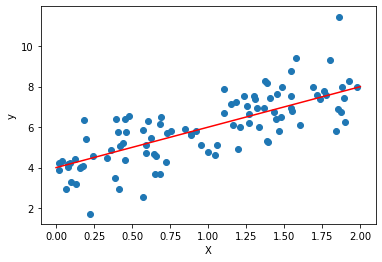

In [5]:
fig, ax = plt.subplots(1,1)
ax.scatter(X, y)
_ = ax.set_xlabel('X')
_ = ax.set_ylabel('y')
x = np.linspace(0,2,100)
ax.plot(x, x*a + b, color='r')

In [6]:
X_b = np.c_[np.ones((100, 1)), X] # add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[3.82652634],
       [2.18471117]])

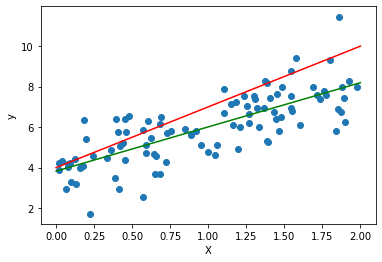

In [7]:
fig, ax = plt.subplots(1,1)
ax.scatter(X, y)
_ = ax.set_xlabel('X')
_ = ax.set_ylabel('y')
x = np.linspace(0,2,100)
ax.plot(x, x*3 + 4, color='r')
ax.plot(x,x*theta_best[1][0] + theta_best[0][0], color='g')

In [8]:
# prediction
X_new = np.array([0, 2]).reshape(-1,1)
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = theta_best.T @ X_new_b.T
y_predict

array([[3.82652634, 8.19594868]])

**Let's do the same with scikit-learn**

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.82652634]), array([[2.18471117]]))

In [10]:
lin_reg.predict(X_new)

array([[3.82652634],
       [8.19594868]])

**or directly with lstsq:**

In [11]:
np.linalg.lstsq(X_b, y, rcond=None)

(array([[3.82652634],
        [2.18471117]]),
 array([111.32548813]),
 2,
 array([14.5512568 ,  4.03441059]))

## Gradient Descent

### Batch Gradient Descent

$
\frac{\partial}{\partial \theta_j}\text{MSE}(\mathbf{\theta})=\frac{2}{m}\sum\limits_{i=1}^{m}(\mathbf{\theta}^\top\mathbf{x}^{(i)}-y^{(i)})x_j^{(i)} 
$

vectorized version: 

$
\nabla_{\theta}\text{MSE}(\mathbf{\theta}) = \begin{pmatrix}
\frac{\partial}{\partial \theta_0}\text{MSE}(\mathbf{\theta}) \\
\frac{\partial}{\partial \theta_1}\text{MSE}(\mathbf{\theta}) \\
\vdots \\
\frac{\partial}{\partial \theta_n}\text{MSE}(\mathbf{\theta})
\end{pmatrix} = \frac{2}{m}\mathbf{X}^\top(\mathbf{X}\mathbf{\theta}-\mathbf{y})
$

Gradient descent step with learning rate $\eta$:

$
\mathbf{\theta}^{(\text{next step})}=\mathbf{\theta}-\eta\nabla_{\mathbf{\theta}}\text{MSE}(\mathbf{\theta})
$

In [14]:
# example 
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
theta

array([[3.82652634],
       [2.18471117]])

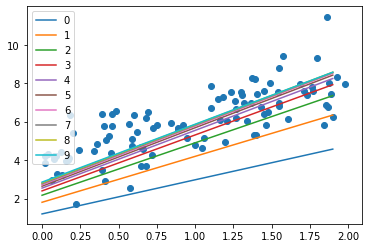

In [15]:
# example plot steps gradient descent
eta = 0.1 # learning rate
n_iterations = 10
m = 100
fig, ax = plt.subplots(1,1)
ax.scatter(X, y)
x = np.arange(0, 2, 0.1)
theta = np.random.rand(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    ax.plot(x, theta[0] + theta[1]* x, label=iteration)
ax.legend()

### Stochastic Gradient Descent

**or with Scikit-Learn:**

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.reshape(-1))
sgd_reg.intercept_, sgd_reg.coef_

(array([3.75825769]), array([2.14694259]))

## Polynomial regression

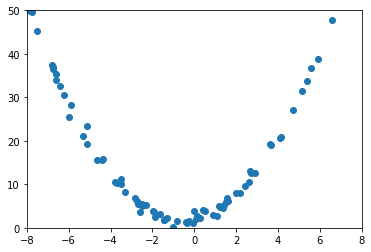

In [17]:
m = 100
mu = 3
sigma = 6

a = 0.9
b=  2

X = sigma * np.random.randn(m, 1) - mu
y = a * X**2 + X + b + np.random.randn(m, 1)

fig, ax = plt.subplots(1,1)
ax.set_xlim((-8,8))
ax.set_ylim(0, 50)
ax.scatter(X, y)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04322802]), array([[1.00533088, 0.90181957]]))

(0, 50)

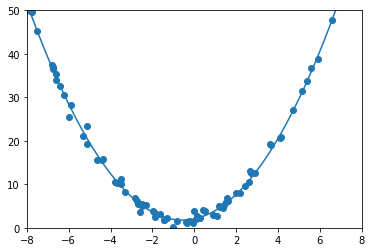

In [19]:
fig, ax = plt.subplots(1,1)
ax.scatter(X, y)
x = np.arange(-15, 15, 0.1)
ax.plot(x, lin_reg.intercept_[0] + lin_reg.coef_[0][1]*x**2 + lin_reg.coef_[0][0]*x)
ax.set_xlim((-8,8))
ax.set_ylim(0, 50)

### Learning curves

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors=[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label='val')
    plt.legend()


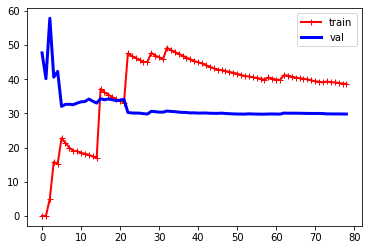

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

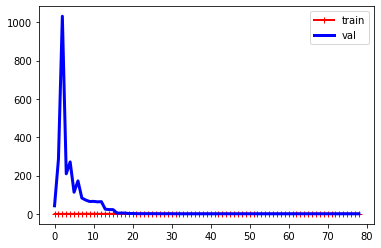

In [22]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)

### Regularized Linear Models


#### Ridge Regression

$
J(\mathbf{\theta})=\text{MSE}(\mathbf{\theta}) + \alpha \frac{1}{2}\sum_{i=1}^n\theta_i^2
$

In [23]:
#example
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[16.11686663]])

In [24]:
# using Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([11.16256524])

#### Lasso Regression

$
J(\mathbf{\theta})=\text{MSE}(\mathbf{\theta})+\alpha\sum_{i=1}^n |\theta_i|
$

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([16.12401786])

#### Elastic Net

$
J(\mathbf{\theta})=\text{MSE}(\mathbf{\theta})+r\alpha\sum_{i=1}^n |\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2
$

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([16.14527928])

## Logistic Regression

estimated probability: 

$
\hat{p}=h_\mathbf{\theta}(\mathbf{x})=\sigma(\mathbf{x}^\top \mathbf{\theta})
$

Logistic function:

$
\sigma(t)=\frac{1}{1+e^{-t}}
$


    

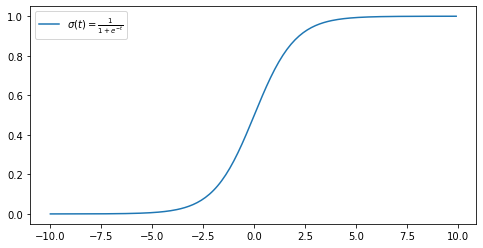

In [27]:
def sigma(t):
    return 1/(1+ np.exp(-t))
fig, ax = plt.subplots(1,1, figsize=(8, 4))
x = np.arange(-10, 10, 0.1)
ax.plot(x,sigma(x), label = r"$\sigma(t) = \frac{1}{1+ e^{-t}}$" )
_ = ax.legend()

Prediction:

$
\hat{y}=\begin{cases}
0  & \text{if} & \hat{p}\lt 0.5\\
1 & \text{if} & \hat{p} \ge 0.5
\end{cases}
$

Cost Function of a single training instance:

$
c(\mathbf{\theta})=\begin{cases}
-\log(\hat{p}) &\text{if} & y = 1\\
-\log(1-\hat{p}) &\text{if} & y=0
\end{cases}
$

Logistic Regression Cost Funtion (log loss):

$
J(\mathbf{\theta})=-\frac{1}{m}\sum\limits_{i=1}^m\left[y^{(i)}\log\left(\hat{p}^{(i)}\right)+(1-y^{(i)})\log\left(1-\hat{p}^{(i)}\right)    \right]
$

Logistic cost function partial derivatives:  
$
\frac{\partial}{\partial\theta_j}J(\mathbf{\theta})=\frac{1}{m}\sum\limits_{i=1}^m\left(\sigma\left(\mathbf{\theta}^\top\mathbf{x}^{(i)}\right)-y^{(i)}\right)x_j^{(i)}
$

In [28]:
#example
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [29]:
X = iris["data"][:, 3].reshape(-1,1 ) # petal width
y = (iris['target'] == 2).astype(np.int)

In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

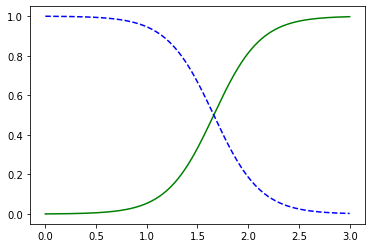

In [32]:
plt.plot(X_new, y_proba[:,1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris virginica")

# Classification

In [33]:
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784', version=1)

In [34]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [35]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

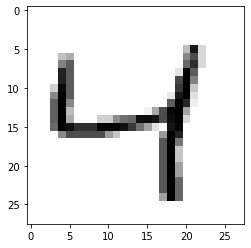

In [36]:
# show some digit
some_digit = X[2]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap='binary')

In [37]:
# split training and test data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [38]:
# training a binary classifier
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [39]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
sgd_clf.predict([some_digit])

array([False])

Implementing cross-validation

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state=None)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))


0.95035
0.96035
0.9604


In [42]:
for i, a in skfolds.split(X_train,y_train_5):
    print(len(i))
    print(a)

40000
[    0     1     2 ... 20331 20342 20359]
40000
[19964 19965 19966 ... 40088 40125 40127]
40000
[39988 39989 39990 ... 59997 59998 59999]


In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [44]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [45]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

## Precision and recall

$
\text{precision} = \frac{TP}{TP+FP} \\
\text{recall} = \frac{TP}{TP+ FN}
$

In [48]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)

(0.8370879772350012, 0.6511713705958311)

$
F_1=\frac{2}{\frac{1}{\text{precision}}+\frac{1}{\text{recall}}}=\frac{TP}{TP+\frac{FN+FP}{2}}
$

In [49]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## The ROC Curve

In [55]:
from sklearn.metrics import roc_curve
y_scores = sgd_clf.decision_function([some_digit])
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
    


ValueError: Found input variables with inconsistent numbers of samples: [60000, 1]